# Warsaw Housting Analyze - DS Project
The final project at the Data Science bootcamp (Kodołamacz Sages)

## 1. Introduction


Buying an apartent for people, especially in Warsaw, is very difficult choice. For many of them it will be investment of their life. According to the last data appartments in Warsaw are still becoming more expensive <sup>[1]</sup>. It is said that they are most expensive in history <sup>[2]</sup>. 

There are many guides in the internet how to buy a apartment. One of them advice to buy a flat from primary market, another counsel to buy apartment from secondary market <sup>[3]</sup>

In this project I going to analyze the adverts posted on "OTODOM" webside https://www.otodom.pl.
Based in the data, I going to choose and optimize the machine learning algorithm to predict appartmet prices form Warsaw market.

[1] "Apartments are still becoming more expensive - more on the secondary market" 
https://www.forbes.pl/gospodarka/ceny-mieszkan-rosna-dane-gus-za-i-kwartal-2019-r/tnznc1c

[2] "Housing prices in Warsaw are huge. The most expensive in history. On average, we already pay over 470 thousand for a flat"
https://warszawa.naszemiasto.pl/ceny-mieszkan-w-warszawie-ogromne-stolica-najdrozsza-w/ar/c3-4889256

[3] "Prices of apartments in 2019. Are you planning to buy an apartment? Check where apartments from the secondary market are more expensive than new ones."
https://strefabiznesu.pl/ceny-mieszkan-2019-planujesz-kupno-mieszkania-sprawdz-gdzie-mieszkania-z-rynku-wtornego-sa-drozsze-od-nowych-20112019-r/ar/c3-14468601


## 2.Import the libaries


In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from scipy import stats
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures,StandardScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score
from sklearn.decomposition import PCA
from sklearn import metrics

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)


## 3. Import the data 


The data used for the analysis come from the "OTODOM" 
scraped 17.11.2019<br>
I collected <b>17 868 ads</b> using Scrapy framework <i><b><a href ="./otolbn/otolbn/otolbn/spiders/otodlbn.py">otodlbn.py</a></b></i> and stored in json file <i><b><a href= "./otolbn/otolbn/20191116_wawa.json">20191116_wawa.json</a></b></i><br>
All ads stored in json file was cleaned by using script in <i><b><a href="data_check.py">data_check.py</a></b> and stored in <i><b><a href="20191117_data_clean_wawa.csv">20191117_data_clean_wawa.csv</a></b></i><br>


In [2]:
df_wwa = pd.read_csv("20191117_data_clean_wawa.csv")
df_wwa.head(5)

,district,area,chamber,market,building,floor,building_floors,construction_year,standard,property,window,heating,url,rent,price
0,Wola,15.0,1,wtórny,NaN,1.0,NaN,2017.0,NaN,pełna własność,NaN,NaN,https://www.otodom.pl/oferta/apartament-inwest...,NaN,199000.0
1,Ursynów,85.0,4,wtórny,blok,1.0,4.0,1980.0,do zamieszkania,spółdzielcze wł. z KW,plastikowe,miejskie,https://www.otodom.pl/oferta/ciche-w-zieleni-4...,NaN,789000.0
2,Ochota,19.6,1,wtórny,blok,3.0,4.0,1963.0,do zamieszkania,pełna własność,plastikowe,miejskie,https://www.otodom.pl/oferta/bezposrednio-kawa...,NaN,290000.0
3,Ursus,72.0,5,wtórny,blok,5.0,7.0,NaN,NaN,pełna własność,plastikowe,miejskie,https://www.otodom.pl/oferta/mieszkanie-72m-ul...,620.0,509000.0
4,Wola,63.8,3,wtórny,blok,3.0,4.0,1993.0,do remontu,spółdzielcze wł. z KW,NaN,miejskie,https://www.otodom.pl/oferta/dla-rodziny-3-pok...,NaN,629000.0


## 4.Checking and analyze the data
### 4.1. Import the data

In [3]:
print(f"Numbers of rows: {df_wwa.shape[0]}, Numbers of columns: {df_wwa.shape[1]} \n")

Numbers of rows: 17868, Numbers of columns: 15 



### 4.2 Data Mining and Visualization

In [4]:
print("Lack of data - columns: \n")
missings = len(df_wwa) - df_wwa.count().sort_values(ascending=True)
print(missings)

Lack of data - columns: 

rent                 11212
window                9368
standard              8028
heating               7714
property              6501
building              3817
construction_year     3678
building_floors       1685
floor                  705
price                  572
district                 0
area                     0
chamber                  0
market                   0
url                      0
dtype: int64


#### For analyze purpose I drop rows where price is NaN value

In [5]:
df_wwa_c = df_wwa.dropna(subset=['price']).copy()
print(f"Numbers of rows: {df_wwa_c.shape[0]}, Numbers of columns: {df_wwa_c.shape[1]} \n")

Numbers of rows: 17296, Numbers of columns: 15 



In [6]:
print("Lack of data - columns: \n")
missings =df_wwa_c.isna().sum()
missings[:15]

Lack of data - columns: 



district                 0
area                     0
chamber                  0
market                   0
building              3663
floor                  704
building_floors       1459
construction_year     3138
standard              7488
property              5961
window                8822
heating               7168
url                      0
rent                 10640
price                    0
dtype: int64

Column without NaN values

In [7]:
missings[missings==0]

district    0
area        0
chamber     0
market      0
url         0
price       0
dtype: int64

In [8]:
print("Type of data")
print(df_wwa_c.dtypes)

Type of data
district              object
area                 float64
chamber                int64
market                object
building              object
floor                float64
building_floors      float64
construction_year    float64
standard              object
property              object
window                object
heating               object
url                   object
rent                 float64
price                float64
dtype: object


In [9]:
X = df_wwa_c.drop(columns='price')
y = df_wwa_c['price']


In [10]:
X.describe(include = 'all')

,district,area,chamber,market,building,floor,building_floors,construction_year,standard,property,window,heating,url,rent
count,17296,17296.000000,17296.000000,17296,13633,16592.000000,15837.000000,14158.000000,9808,11335,8474,10128,17296,6656.000000
unique,24,NaN,NaN,2,7,NaN,NaN,NaN,3,4,3,6,17296,NaN
top,Mokotów,NaN,NaN,wtórny,blok,NaN,NaN,NaN,do zamieszkania,pełna własność,plastikowe,miejskie,https://www.otodom.pl/oferta/2-pok-na-brodnie-...,NaN
freq,3286,NaN,NaN,11980,6449,NaN,NaN,NaN,5514,9243,6398,8937,1,NaN
mean,NaN,69.849587,2.834123,NaN,NaN,3.158570,6.309149,1998.502472,NaN,NaN,NaN,NaN,NaN,474.445312
std,NaN,40.927333,1.075445,NaN,NaN,2.762185,5.253827,255.632345,NaN,NaN,NaN,NaN,NaN,239.742389
min,NaN,2.000000,1.000000,NaN,NaN,0.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,46.000000,2.000000,NaN,NaN,1.000000,4.000000,1979.000000,NaN,NaN,NaN,NaN,NaN,350.000000
50%,NaN,60.000000,3.000000,NaN,NaN,2.000000,5.000000,2008.000000,NaN,NaN,NaN,NaN,NaN,500.000000
75%,NaN,81.102500,3.000000,NaN,NaN,4.000000,8.000000,2019.000000,NaN,NaN,NaN,NaN,NaN,640.000000


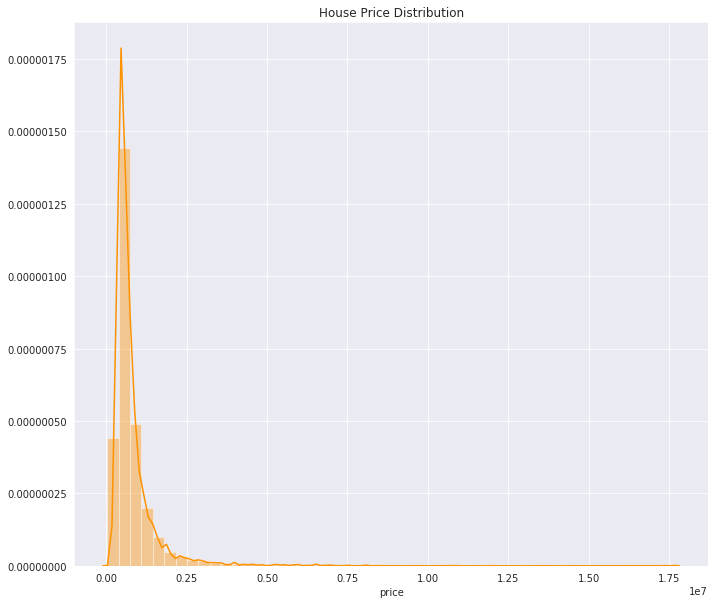

In [11]:
sns.set_palette(sns.color_palette("Wistia_r"))

sns.set_style("darkgrid")
plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
plt.title('House Price Distribution')
sns.distplot(y)
plt.show()

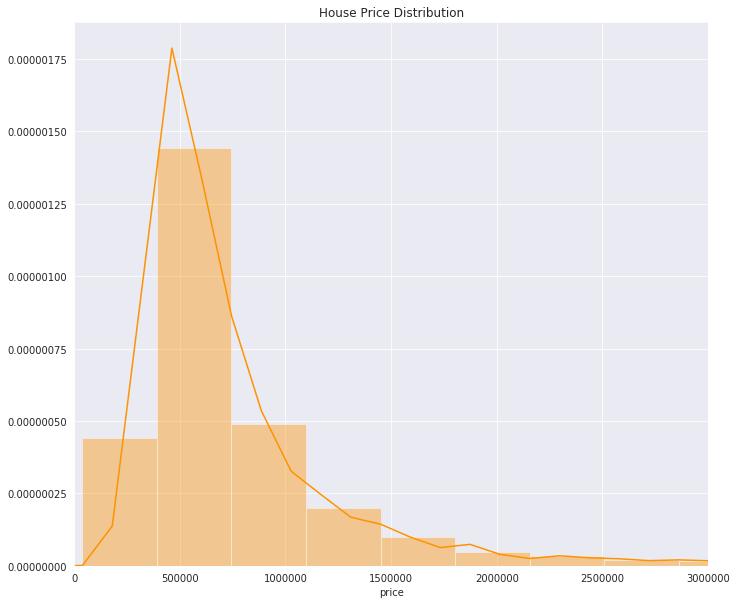

In [12]:
sns.set_style("darkgrid")
plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
plt.title('House Price Distribution')
sns.distplot(y).set(xlim=(0, 3000000))
plt.show()

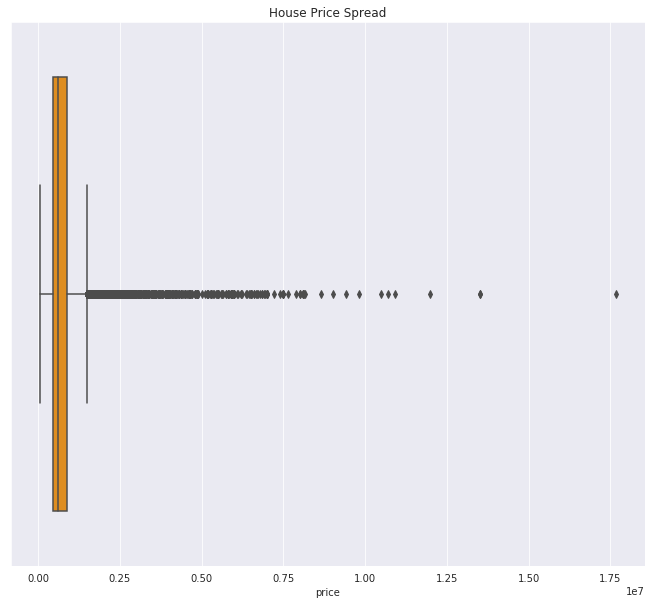

In [13]:
plt.figure(figsize=(25,10))
plt.subplot(1,2,2)
plt.title('House Price Spread')
sns.boxplot(y)
plt.show()

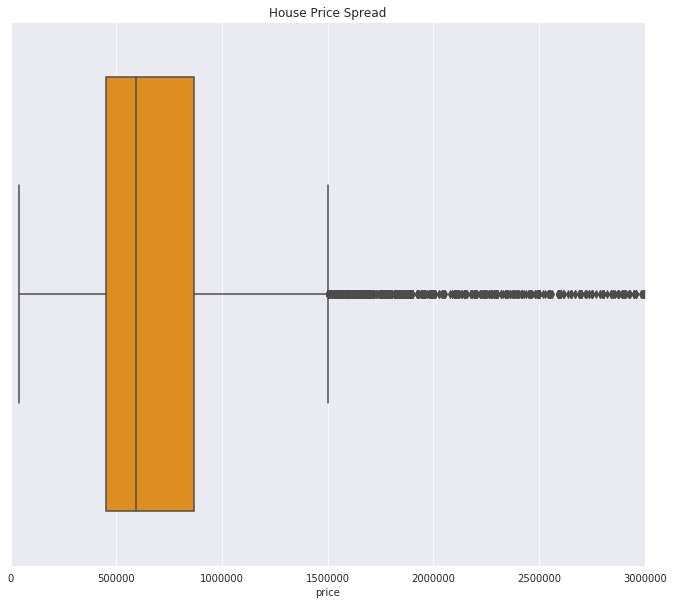

In [14]:
plt.figure(figsize=(25,10))
plt.subplot(1,2,2)
plt.title('House Price Spread')
sns.boxplot(y).set(xlim=(0, 3000000))
plt.show()

#### District where houses are available

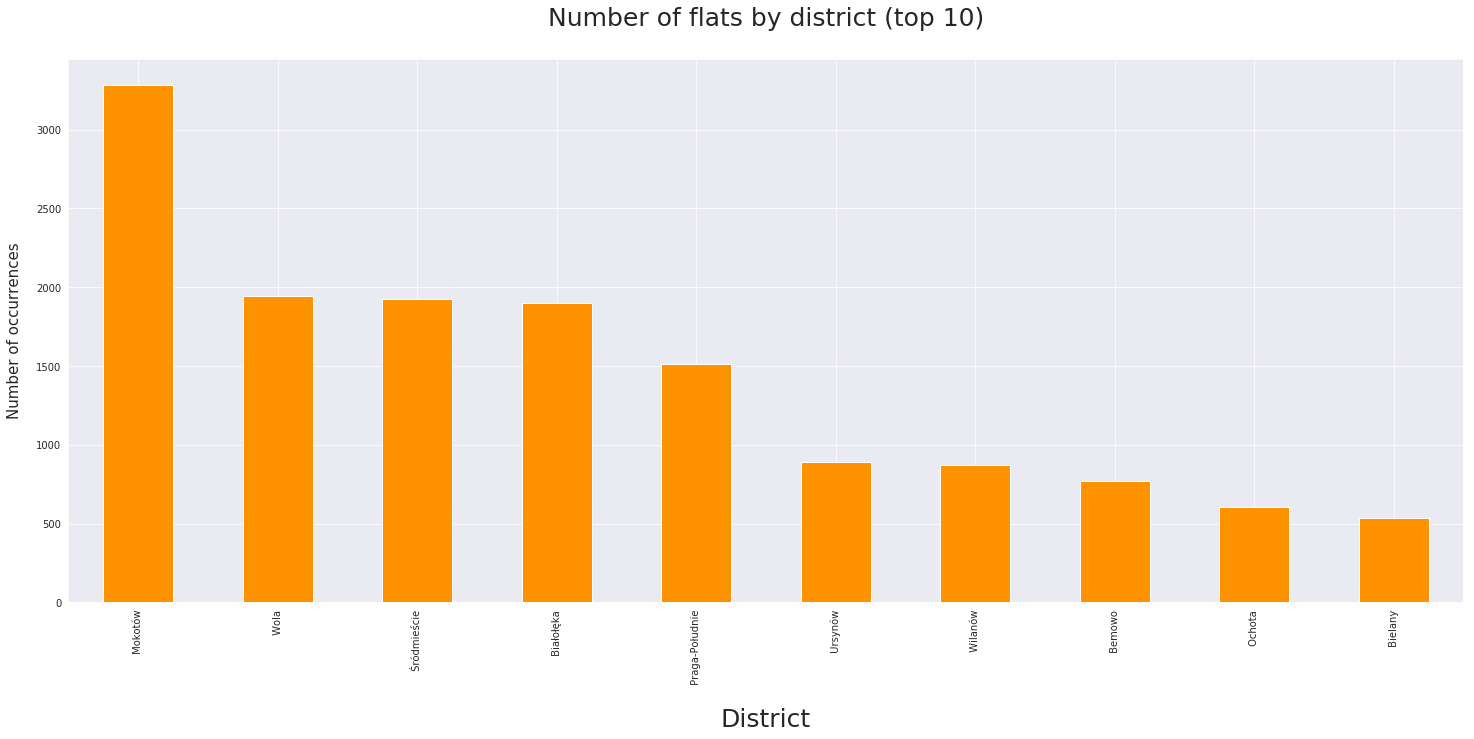

In [15]:
district_available = X["district"].value_counts()
district_available[:10].plot.bar(figsize=(25,10))
plt.title('Number of flats by district (top 10)', fontsize=25, y=1.05)
plt.ylabel('Number of occurrences', fontsize=15, labelpad=14)
plt.xlabel('District', fontsize=25, labelpad=20)
plt.show()

In [16]:
district_available[:10]

 Mokotów           3286
 Wola              1943
 Śródmieście       1922
 Białołęka         1899
 Praga-Południe    1511
 Ursynów            890
 Wilanów            873
 Bemowo             773
 Ochota             607
 Bielany            532
Name: district, dtype: int64

#### Houses area

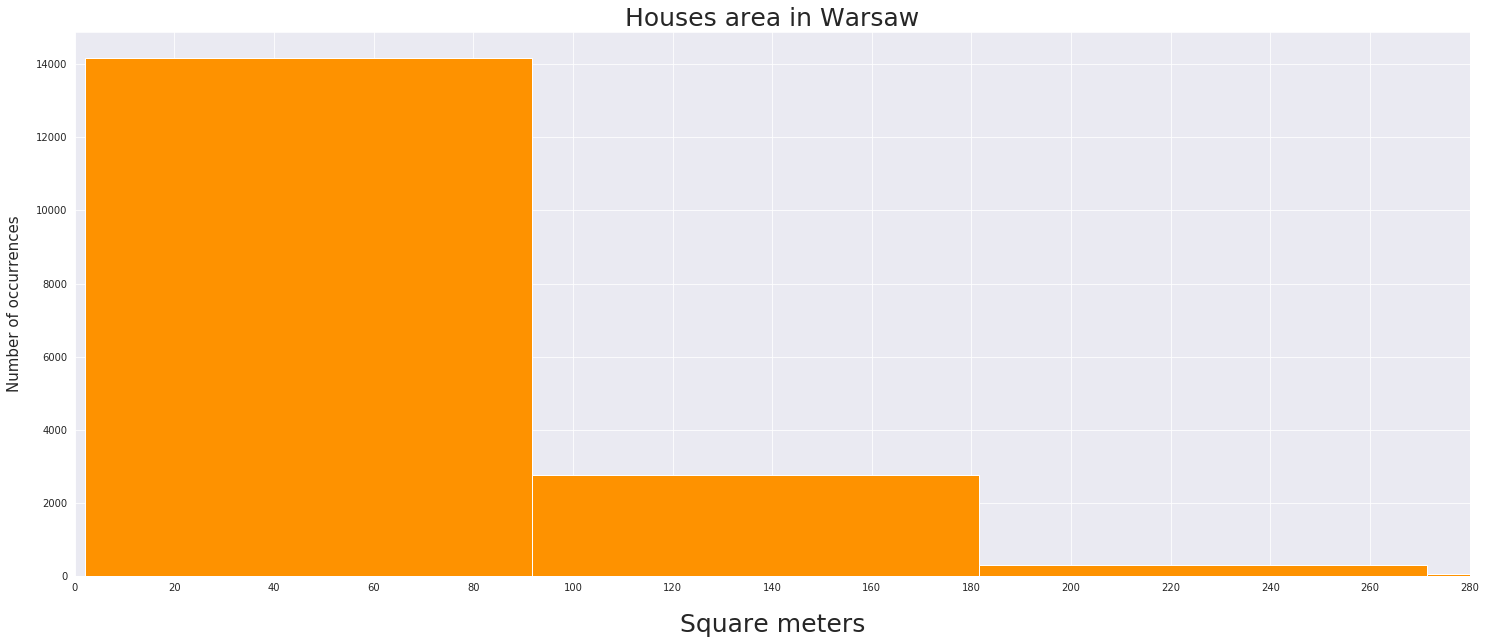

In [17]:
X['area'].hist(figsize = (25,10))
plt.title('Houses area in Warsaw', fontsize=25)
plt.xlim(0,270)
plt.xticks(range(0,300,20))
plt.ylim(0)
plt.ylabel('Number of occurrences', fontsize=15, labelpad=14)
plt.xlabel('Square meters', fontsize=25, labelpad=20)
plt.show()

#### Number of chambers

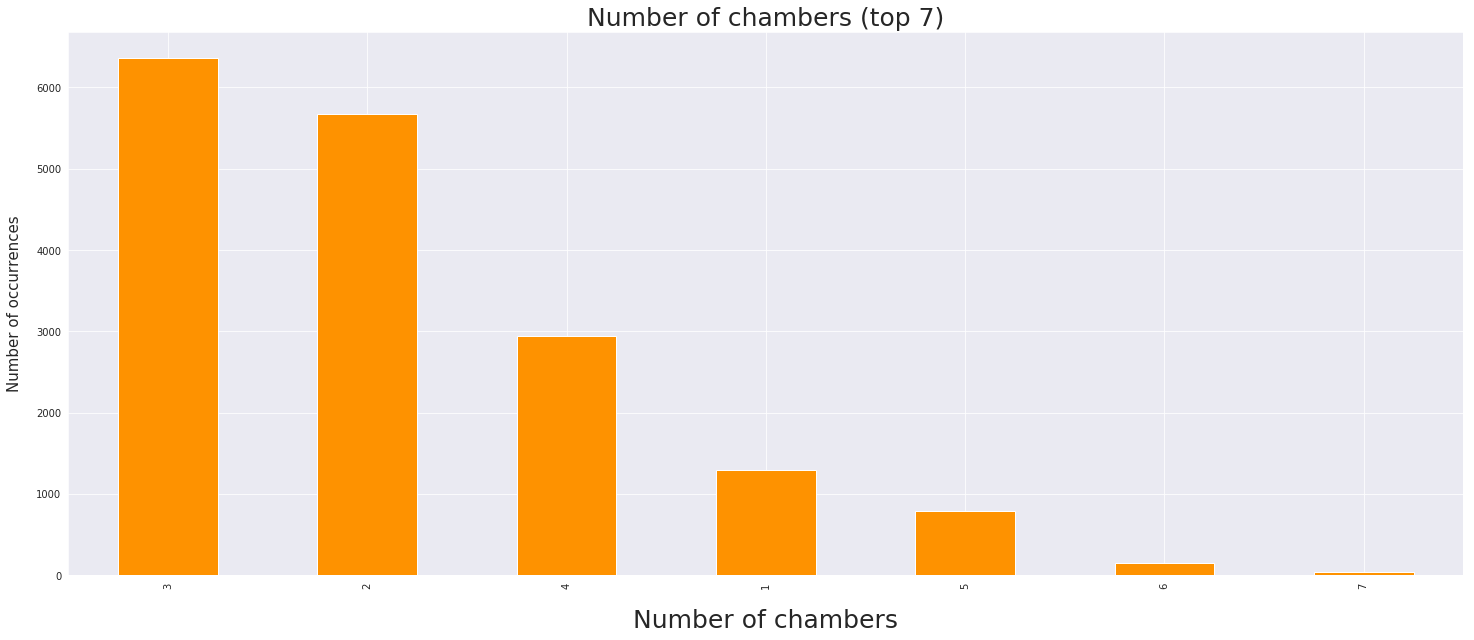

In [21]:
chamber_num = X["chamber"].value_counts()
chamber_num[:7].plot.bar(figsize=(25,10))
plt.title('Number of chambers (top 7)', fontsize=25)
plt.ylabel('Number of occurrences', fontsize=15, labelpad=14)
plt.xlabel('Number of chambers', fontsize=25, labelpad=20)
plt.show()

In [22]:
chamber_num[:7]

3    6366
2    5670
4    2943
1    1293
5     793
6     149
7      41
Name: chamber, dtype: int64

#### Prime or secondary market ?

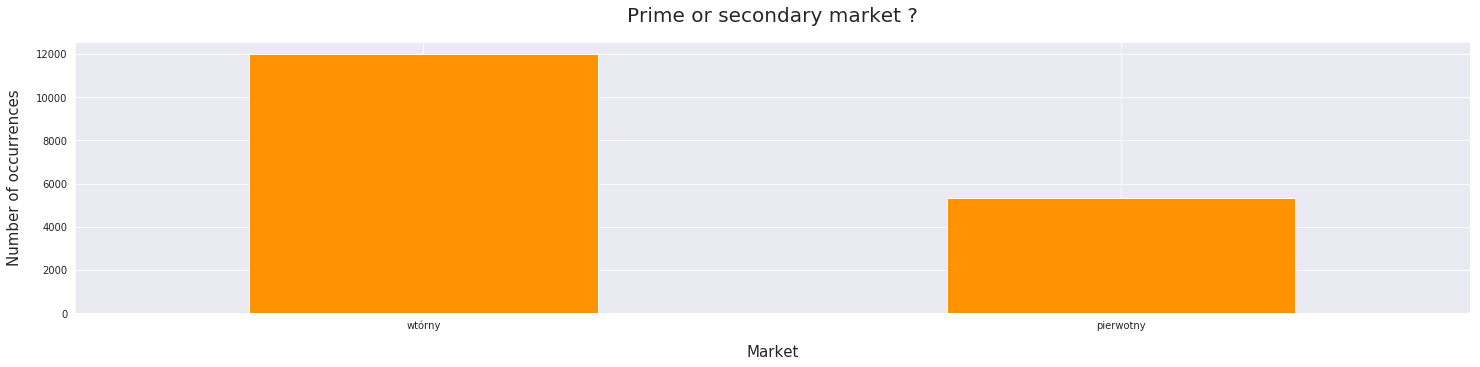

In [23]:
market_wwa = X["market"].value_counts()
market_wwa[:2].plot.bar(figsize=(25,5), rot = 0)
plt.title('Prime or secondary market ?', fontsize=20, y=1.05)
plt.ylabel('Number of occurrences', fontsize=15, labelpad=14)
plt.xlabel('Market', fontsize=15, labelpad=14)
plt.show()

In [24]:
market_wwa[:2]

wtórny       11980
pierwotny     5316
Name: market, dtype: int64

### Corelation beetween the data

#### Correlation between area and price

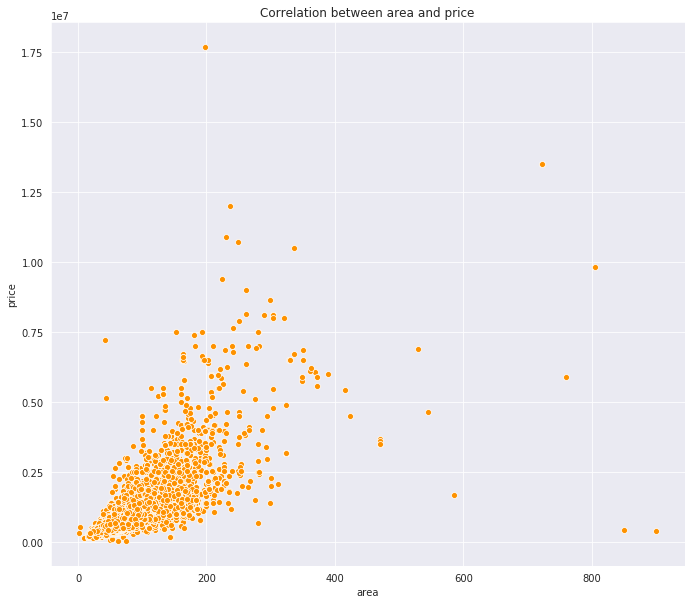

In [25]:
sns.set_style("darkgrid")
plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
plt.title('Correlation between area and price')
sns.scatterplot(X["area"], y)
plt.show()

### Correlation between area and price according to the type of building

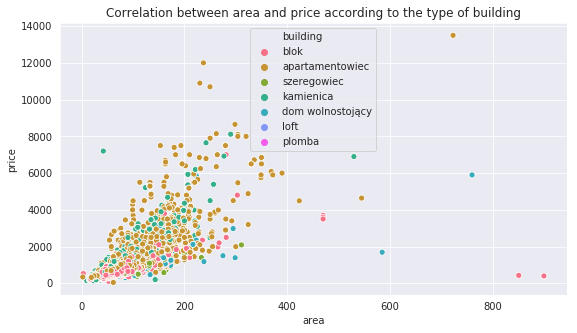

In [26]:
sns.set_style("darkgrid")
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.title('Correlation between area and price according to the type of building')
sns.scatterplot(X["area"], y/1000, hue=X["building"])
plt.show()

### Correlation between area and price according to the market

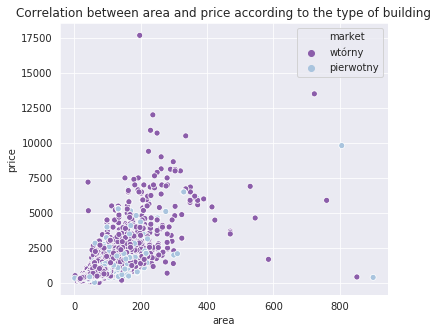

In [27]:
sns.set_palette(sns.color_palette("BuPu_r",2))

sns.set_style("darkgrid")
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.title('Correlation between area and price according to the type of building')
sns.scatterplot(X["area"], y/1000, hue=X["market"])
plt.show()

### Correlation between area and price according to the district

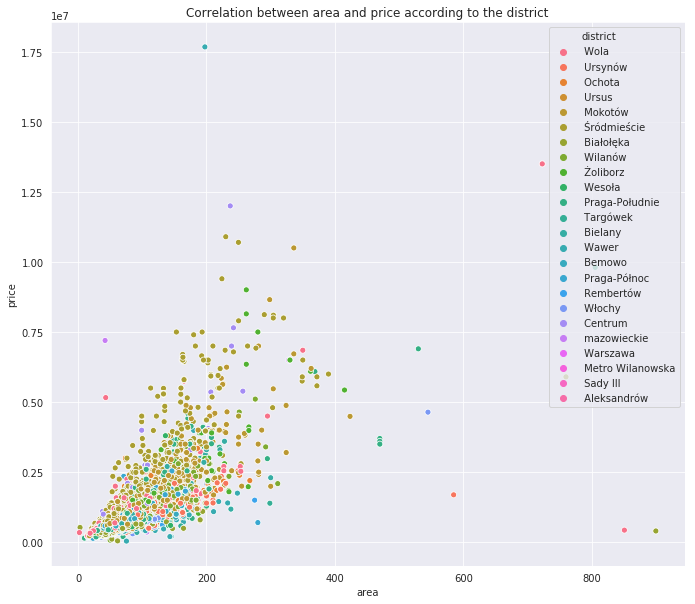

In [28]:
sns.set_palette(sns.color_palette("BuPu_r",2))

sns.set_style("darkgrid")
plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
plt.title('Correlation between area and price according to the district')
sns.scatterplot(X["area"], y, hue=X['district'])
plt.show()

People publishing the ad were free to provide the name of the district. 
The data must be cleaned in the next step.

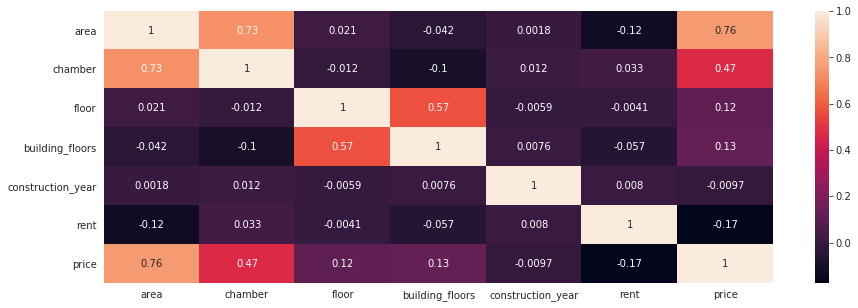

In [29]:
sns.set_style("darkgrid")
plt.figure(figsize=(15,5))
sns.heatmap(df_wwa_c.corr(), annot=True)
plt.show()

### First conclusions

* Many of the columns like 'url', 'heating', 'window', 'construction_year' and 'rent' seems to be unnecessary.

* There are outliers in the dataset, which may cause problems in predicting models.

* Categorical features are not directly correlated with price. 

## 5. Data Preparation
I decided to remove columns 'url', 'heating', 'window', 'construction_year', 'rent' .
<br>
The process of cleansing data and replacing Null values in data is performed by the FTransformer class

In [30]:
class OptimusTrans(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        x = X.copy()
        
        x.drop(['url', 'heating', 'window', 'construction_year', 'rent'], axis=1, inplace=True)
    
        #  category - lack of data fill with most frequent feature
        
        cat_features = [
            "district", "area", "chamber", "market", "building", 
            "floor", "building_floors", "standard", "property"           
        ]

        x["building"] = x["building"].fillna(x["building"].value_counts().index[0])
        x["building"] = x["building"].astype(object)
                
        x["standard"] = x["standard"].fillna(x["standard"].value_counts().index[0])
        x["standard"] = x["standard"].astype(object)
                
        x["property"] = x["property"].fillna(x["property"].value_counts().index[0])
        x["property"] = x["property"].astype(object)

        
        x["district"] = x["district"].str.replace("Sady III", "Żoliborz")
        x["district"] = x["district"].str.replace("Aleksandrów", "Wawer")
        x["district"] = x["district"].str.replace("Metro Wilanowska", "Mokotów")
        x["district"] = x["district"].str.replace("Warszawa", "Centrum")
        x["district"] = x["district"].str.replace("mazowieckie", "Centrum")

        warsaw_districts  = [
                             'Mokotów', 'Wola', 'Śródmieście', 'Białołęka', 'Praga-Południe', 'Ursynów',
                             'Wilanów', 'Bemowo', 'Ochota', 'Bielany', 'Praga-Północ', 'Żoliborz', 'Targówek',
                             'Ursus', 'Wawer', 'Włochy', 'Wesoła', 'Centrum', 'Rembertów'
                            ]
        
        x["district"] = x["district"].astype(object)
        
        # numeric - lack of data fill with median
                
        x["area"] = x["area"].astype(int) 
                
        x["chamber"] = x["chamber"].astype(int) 
                
        x["floor"] = x["floor"].fillna(x["floor"].median())
        x["floor"] = x["floor"].astype(int)
                
        x["building_floors"] = x["building_floors"].fillna(x["building_floors"].median())
        x["building_floors"] = x["building_floors"].astype(int)
      
       
        return x

In [31]:
x_transf = OptimusTrans()
X_copy = X.copy()
data_wwa = x_transf.fit_transform(X_copy)

#### Correlation between car price and the other numeric features

In [32]:
data_wwa["price"]=y

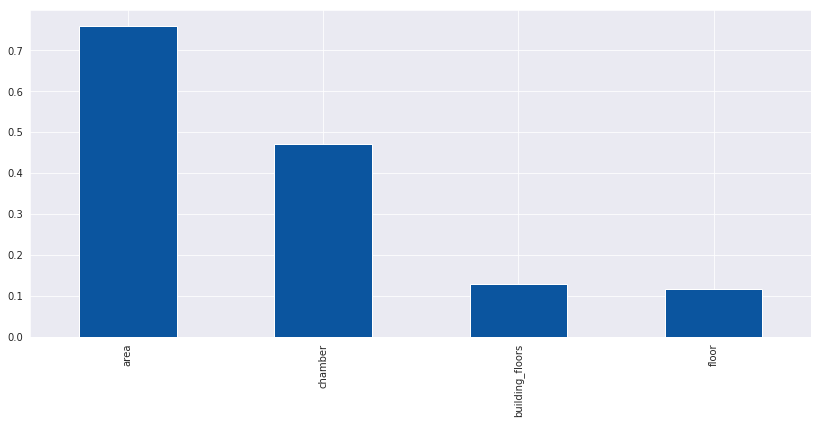

In [33]:
corr_price = data_wwa.corr()["price"].sort_values(ascending=False)
sns.set_palette(sns.color_palette("Blues_r"))
plt.figure(figsize=(14,6))
corr_ = corr_price.drop("price")
corr_.plot.bar()
plt.show()

In [34]:
corr_[:10]

area               0.759710
chamber            0.470232
building_floors    0.128809
floor              0.115803
Name: price, dtype: float64

The greatest is the correlation of house price with "area" (around 0.76).

In [35]:
data_wwa.describe()

,area,chamber,floor,building_floors,price
count,17296.000000,17296.000000,17296.000000,17296.000000,1.729600e+04
mean,69.600601,2.834123,3.111413,6.198716,8.033233e+05
std,40.938173,1.075445,2.715053,5.040489,7.591514e+05
min,2.000000,1.000000,0.000000,1.000000,3.900000e+04
25%,46.000000,2.000000,1.000000,4.000000,4.490000e+05
50%,60.000000,3.000000,2.000000,5.000000,5.923530e+05
75%,81.000000,3.000000,4.000000,7.000000,8.690000e+05
max,900.000000,10.000000,11.000000,222.000000,1.767421e+07


In [36]:
data_wwa

,district,area,chamber,market,building,floor,building_floors,standard,property,price
0,Wola,15,1,wtórny,blok,1,5,do zamieszkania,pełna własność,199000.0
1,Ursynów,85,4,wtórny,blok,1,4,do zamieszkania,spółdzielcze wł. z KW,789000.0
2,Ochota,19,1,wtórny,blok,3,4,do zamieszkania,pełna własność,290000.0
3,Ursus,72,5,wtórny,blok,5,7,do zamieszkania,pełna własność,509000.0
4,Wola,63,3,wtórny,blok,3,4,do remontu,spółdzielcze wł. z KW,629000.0
5,Mokotów,47,3,wtórny,blok,1,4,do zamieszkania,spółdzielcze wł. z KW,469000.0
6,Śródmieście,56,3,wtórny,blok,0,5,do zamieszkania,pełna własność,649900.0
7,Białołęka,66,2,wtórny,apartamentowiec,1,4,do zamieszkania,pełna własność,490000.0
8,Białołęka,40,2,wtórny,blok,1,3,do zamieszkania,pełna własność,395000.0
9,Śródmieście,70,2,wtórny,blok,0,12,do zamieszkania,spółdzielcze własnościowe,810000.0


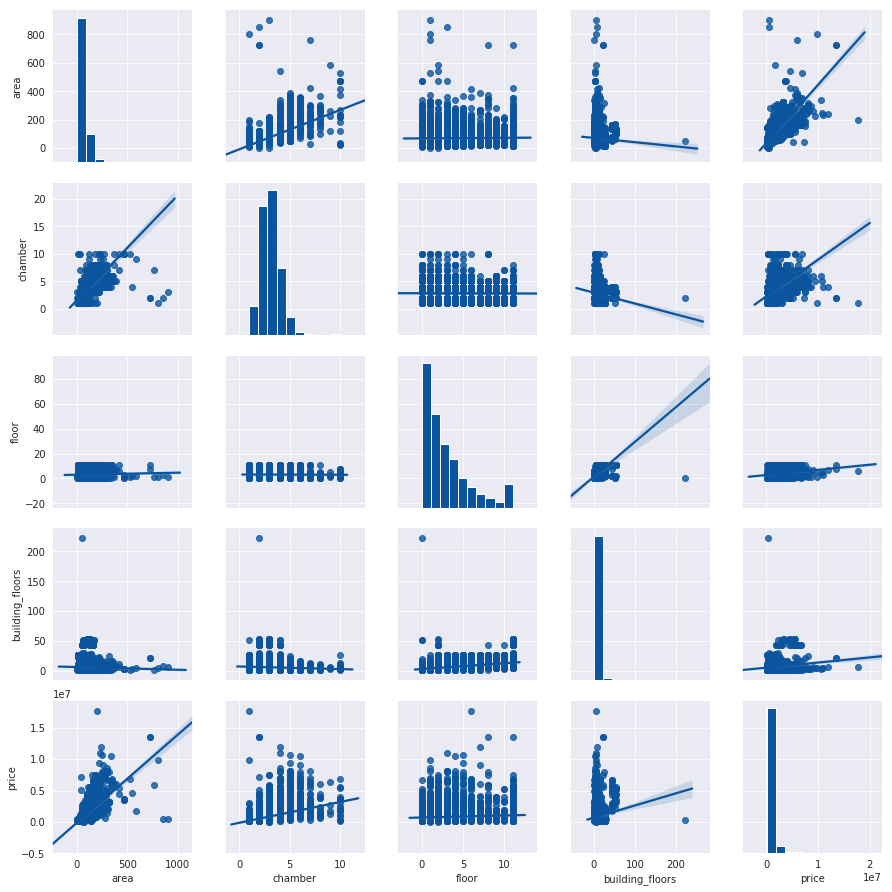

In [37]:
sns.pairplot(data_wwa, kind="reg")
plt.show()

Object to select column by type

In [38]:
class ColumnSelector(BaseEstimator, TransformerMixin):
    """Transformer to select column of specified type."""
        
    def __init__(self, column_type):
        self.column_type_ = column_type

    def fit(self, X, y=None):  
        self.columns_to_select = list(X.select_dtypes(include=self.column_type_).columns)
        
        return self
    
    def transform(self, X):        
        return X[self.columns_to_select]

Pipeline to standarize the number vales and encode categorical values.

In [39]:
preprocessor = FeatureUnion([
    ("numeric_branch", Pipeline([
        ("num_features_selector", ColumnSelector(np.number)),
        ("scaler", StandardScaler())     
    ])),
    ("categorical_branch", Pipeline([
        ("cat_features_selector", ColumnSelector(object)),
        ("onhot_encoder", OneHotEncoder(sparse=False, handle_unknown='ignore'))   
    ]))
]) 

Split data to test and train

In [45]:
X = data_wwa.copy().drop(["price"], axis=1)
y = data_wwa["price"].copy()

X_train_t, X_test_t, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1002)

In [46]:
X_train = preprocessor.fit_transform(X_train_t)

In [47]:
X_train.shape

(13836, 39)

In [48]:
X_test = preprocessor.fit_transform(X_test_t)

In [49]:
X_test.shape

(3460, 37)

## PCA

I tried to reduce the number of dimension to speed up the process of modeling.

In [50]:
X_train_pca = X_train.copy()

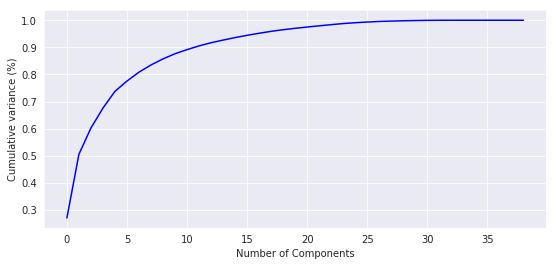

In [58]:
pca = PCA() 
x_pca = pca.fit_transform(X_train_pca)
plt.figure(figsize=(9,4)) 
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='b')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative variance (%)')
plt.show()

In [63]:
pca = PCA(n_components=0.95) 
x_pca = pca.fit_transform(X_train_pca)
x_pca.shape

(13836, 17)

17 components needed for explained 95% variance

In [67]:
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("pca", PCA(n_components=0.95))
])
X_train = pipeline.fit_transform(X_train_t)
X_train.shape

(13836, 17)

In [68]:
X_test = pipeline.transform(X_test_t)
X_test.shape

(3460, 17)

# 6. Modeling

### LinearRegression

In [69]:
kfold = KFold(n_splits=5, random_state=42)

In [70]:
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [71]:
grid_1 = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4]},
                    cv=kfold,
                    refit=True)
grid_1.fit(X_train, y_train)
grid_1.best_params_

{'polynomialfeatures__degree': 1}

### Ridge

In [72]:
RR = Ridge()
RR.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [73]:
grid_2 = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), Ridge(alpha=1, tol=0.1)),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4],
                    'ridge__alpha': [0.1, 1, 2, 3]},
                    cv=5,
                    refit=True)
grid_2.fit(X_train, y_train)
grid_2.best_params_

{'polynomialfeatures__degree': 1, 'ridge__alpha': 3}

### Elastic Net

In [74]:
EN = ElasticNet()
EN.fit(X_train, y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [76]:
grid_3 = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), ElasticNet(alpha=1, tol=0.1)),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3],
                    'elasticnet__alpha': [0.3, 0.4, 1]},
                    cv=kfold,
                    refit=True)
grid_3.fit(X_train, y_train)
grid_3.best_params_

/home/mazowy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 861977906345666.0, tolerance: 653520522421080.6
  positive)
/home/mazowy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 701357281450576.6, tolerance: 596077290637415.6
  positive)
/home/mazowy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 839298854499423.4, tolerance: 614234471845312.6
  positive)
/home/mazowy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the num

{'elasticnet__alpha': 1, 'polynomialfeatures__degree': 3}

### Lasso

In [80]:
LS = Lasso()
LS.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [82]:
grid_4 = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), Lasso(alpha=1, tol=0.1)),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4],
                    'lasso__alpha': [0.1, 1, 2]},
                    cv=5,
                    refit=True)
grid_4.fit(X_train, y_train)
grid_4.best_params_

/home/mazowy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 763863963415598.0, tolerance: 653520522421080.6
  positive)
/home/mazowy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 729126128374053.2, tolerance: 614234471845312.6
  positive)
/home/mazowy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 699978311791898.8, tolerance: 641563743471809.8
  positive)
/home/mazowy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the num

{'lasso__alpha': 2, 'polynomialfeatures__degree': 1}

### SVR

In [92]:
SVR_t = SVR()
SVR_t.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [93]:
grid_5 = GridSearchCV(SVR(kernel='rbf'),
                   param_grid={"C": [1, 10, 100, 1000, 10000],
                               "gamma": [0.0001, 0.001, 0.01, 0.1, 1, 10]},
                    cv=kfold,
                    refit=True)
grid_5.fit(X_train, y_train)
grid_5.best_params_

{'C': 10000, 'gamma': 0.01}

### RandomForrest

In [94]:
RF = RandomForestRegressor()
RF.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [95]:
grid_6 = GridSearchCV(RandomForestRegressor(n_jobs=-1, max_features= 'sqrt', n_estimators=50, oob_score = True),
                   param_grid={
                   'n_estimators': [100, 150, 300],
                    'max_features': ['auto', 'sqrt', 'log2'],
                   },
                    cv=kfold,
                    refit=True)
grid_6.fit(X_train, y_train)
grid_6.best_params_

{'max_features': 'log2', 'n_estimators': 300}

### XGB Regression

In [96]:
XGB = XGBRegressor()
XGB.fit(X_train, y_train)

[21:35:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [97]:
grid_7 = GridSearchCV(XGBRegressor(nthreads=-1, n_estimators=50),
                     param_grid={
                         'n_estimators': [100, 150, 300],
                     },
                     cv=kfold,
                     refit=True)
grid_7.fit(X_train, y_train)
grid_7.best_params_

[21:35:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

{'n_estimators': 300}

# 7. Comparison of model efficiency

In [98]:
models = []
models.append(('LR', grid_1.best_estimator_))
models.append(('Ridge', grid_2.best_estimator_))
models.append(('Elastic_Net', grid_3.best_estimator_))
models.append(('Lasso', grid_4.best_estimator_))
models.append(('SVR', grid_5.best_estimator_))
models.append(('RFR', grid_6.best_estimator_))
models.append(('XGBR', grid_7.best_estimator_))

In [99]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

--------------------------------------------------------------------------------
LR 

R^2: 0.703
Median absolute error: 121407.297
Mean absolute error: 205419.929
Mean absolute percentage error: 25.934


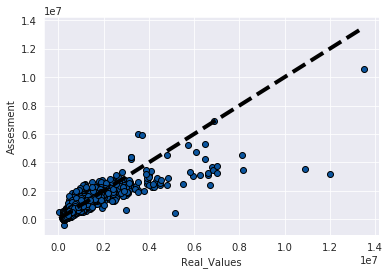

--------------------------------------------------------------------------------
Ridge 

R^2: 0.703
Median absolute error: 121466.883
Mean absolute error: 205368.022
Mean absolute percentage error: 25.921


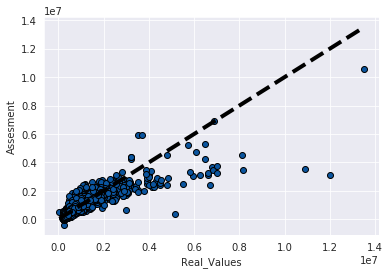

--------------------------------------------------------------------------------
Elastic_Net 

R^2: 0.72
Median absolute error: 112928.814
Mean absolute error: 187426.456
Mean absolute percentage error: 23.622


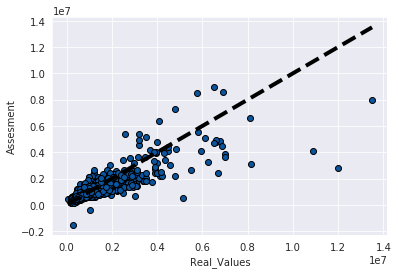

--------------------------------------------------------------------------------
Lasso 

R^2: 0.703
Median absolute error: 121400.34
Mean absolute error: 205416.693
Mean absolute percentage error: 25.933


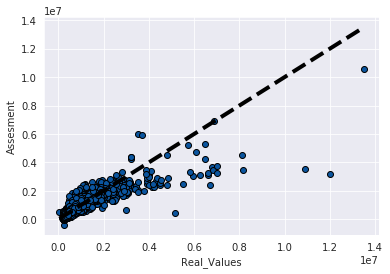

--------------------------------------------------------------------------------
SVR 

R^2: 0.463
Median absolute error: 76697.086
Mean absolute error: 195447.248
Mean absolute percentage error: 17.874


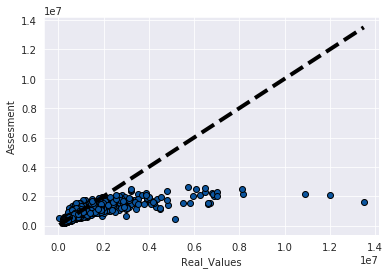

--------------------------------------------------------------------------------
RFR 

R^2: 0.82
Median absolute error: 44130.205
Mean absolute error: 121562.042
Mean absolute percentage error: 13.513


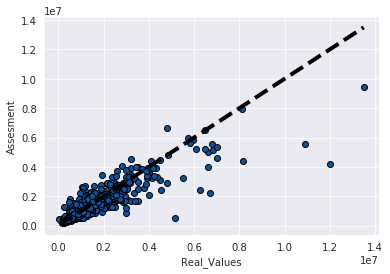

--------------------------------------------------------------------------------
XGBR 

R^2: 0.825
Median absolute error: 71405.094
Mean absolute error: 145590.334
Mean absolute percentage error: 16.673


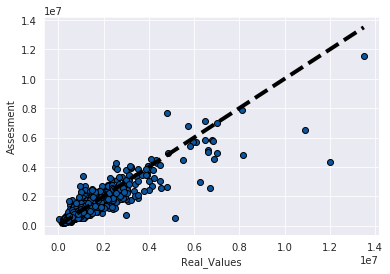

In [100]:
for name, model in models:
    print("-"*80)
    print(name, "\n")
    print(f"R^2: {round(metrics.r2_score(y_test, model.predict(X_test)), 3)}")
    print(f"Median absolute error: {round(metrics.median_absolute_error(y_test, model.predict(X_test)), 3)}")
    print(f"Mean absolute error: {round(metrics.mean_absolute_error(y_test, model.predict(X_test)), 3)}")
    print(f"Mean absolute percentage error: {round(mean_absolute_percentage_error(y_test, model.predict(X_test)), 3)}")
    
    results = pd.DataFrame()
    results['actual'] = y_test
    results['predicted'] = model.predict(X_test)
    fig, ax = plt.subplots()
    ax.scatter(results['actual'], results['predicted'], edgecolors=(0, 0, 0))
    ax.plot([results['actual'].min(), results['actual'].max()], [results['actual'].min(), results['actual'].max()], 'k--', lw=4)
    ax.set_xlabel('Real_Values')
    ax.set_ylabel('Assesment')
    plt.show()

### R2 SCORE

In [101]:
r2_cv_results = pd.DataFrame()

for name, model in models:
    r2_cv_results[name] = cross_val_score(model, X_test, y_test, cv=kfold,scoring="r2")

/home/mazowy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 212588689286234.03, tolerance: 161702184729329.84
  positive)
/home/mazowy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 210149072769000.12, tolerance: 159980823584248.22
  positive)
/home/mazowy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 229312756583613.12, tolerance: 178573819576506.97
  positive)
/home/mazowy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase t

[21:37:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


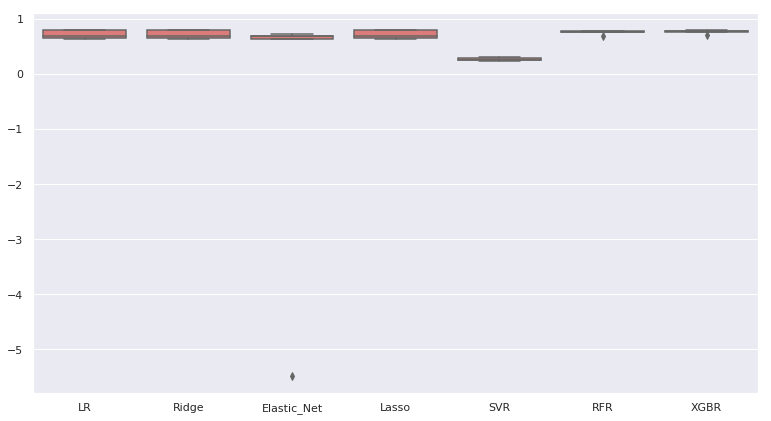

In [106]:
plt.figure(figsize=(13,7))
sns.set(font_scale=1)
sns.boxplot(data=r2_cv_results, color = '#eb6c6a')
plt.show()

### MEAN ABSOLUTE ERROR

In [103]:
mae_cv_results = pd.DataFrame()

for name, model in models:
    mae_cv_results[name] = cross_val_score(model, X_test, y_test, cv=kfold,scoring="neg_mean_absolute_error")

/home/mazowy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 212588689286234.03, tolerance: 161702184729329.84
  positive)
/home/mazowy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 210149072769000.12, tolerance: 159980823584248.22
  positive)
/home/mazowy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 229312756583613.12, tolerance: 178573819576506.97
  positive)
/home/mazowy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase t

[21:38:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


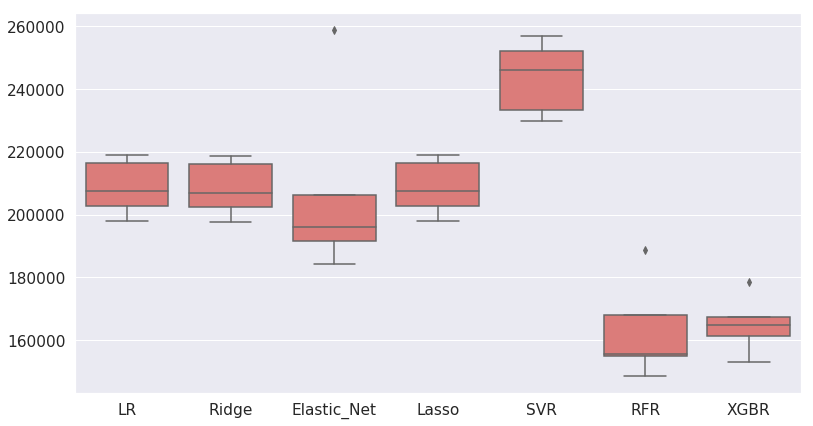

In [104]:
plt.figure(figsize=(13,7))
sns.set(font_scale=1.4)
sns.boxplot(data=-mae_cv_results, color = '#eb6c6a')
plt.show()

# Sum up of analyzes

The best predicting model in my analyze was '''Random Forrest Regression''' with R^2: 0.82
Median absolute error: 44130.205.Even when using CV its results is the best. Despite of very high price variation in Warsaw market it fit the best to the real data.

### Conclusion

It turns out that it is difficult to evaluate an offer based solely on an ad. An additional difficulty in this task is that we work on bidding prices.
They depend on the market but are determined according to the seller's and real estate complany own assessment and can often be badly priced. 